## import & load

In [5]:
import pandas as pd
import numpy as np
import sys
import requests
import pprint

from collections import defaultdict
import datetime
import pytz
import importlib
import matplotlib.pyplot as plt

import datetime, json, math
from google.cloud import bigquery
from numpy_ext import rolling_apply as rolling_apply_ext

In [6]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)

In [7]:
import os

if os.path.exists('credential.json'):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.join(os.getcwd(), 'credential.json')
    os.environ["GOOGLE_CLOUD_PROJECT"] = "trading-290017"
else:
    print('the credential.json file does not exist')

import importlib

In [8]:
import market_data.ingest.bq.cache
importlib.reload(market_data.ingest.bq.cache)
importlib.reload(market_data.ingest.bq.candle)

<module 'market_data.ingest.bq.candle' from '/home/junlim/projects/jitter_recovery/market_data/ingest/bq/candle.py'>

## calculate/cache features

In [9]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [10]:
feature_param = algo.collective_jitter_recovery.calculate.CollectiveJitterFeatureParam(window=40, collective_window=30)

In [11]:
algo.collective_jitter_recovery.research.get_feature_label_for_caching(feature_param)

'feature/(collectivechanges)_window(40)_collective_window(30)'

In [12]:
import market_data.ingest.bq.common

## multiple symbols

In [13]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)
import algo.cache
importlib.reload(algo.cache)

<module 'algo.cache' from '/home/junlim/projects/jitter_recovery/algo/cache.py'>

In [14]:
trading_param = algo.collective_jitter_recovery.calculate.CollectiveRecoveryTradingParam(
    feature_param, 
    collective_drop_recovery_trading_param = algo.collective_jitter_recovery.calculate.CollectiveDropRecoveryTradingParam(
        -0.03, -0.30, -0.03, +0.005, -0.01),
    collective_jump_recovery_trading_param = None,
)

In [15]:
algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param)

'trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)'

In [21]:
date_str_from='2024-03-01'
date_str_to='2024-05-10'

<Axes: xlabel='timestamp'>

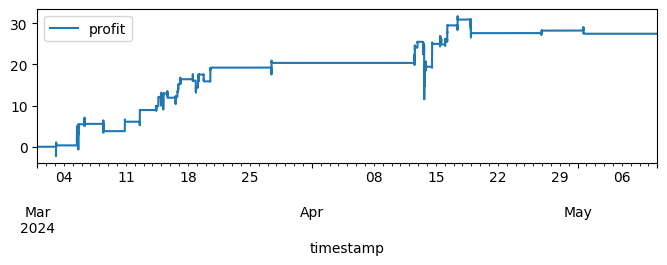

In [20]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.OKX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 15:59:33,584 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)/trading-290017.market_data_cex.by_minute/2024-03-01T00:00:00-0500_2024-03-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 15:59:33,586 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 3, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 3, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 15:59:33,641 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_col

<Axes: xlabel='timestamp'>

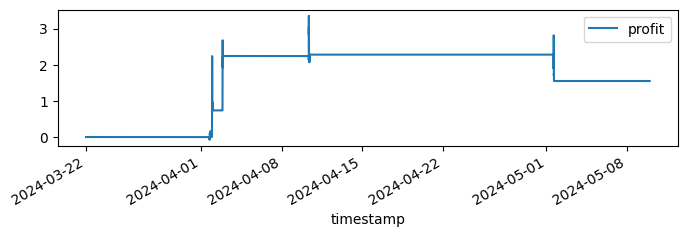

In [22]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.CEX,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [32]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.BINANCE,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from='2024-04-12', 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
#dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

In [37]:
#dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 16:01:08,064 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)/trading-290017.market_data_gemini.by_minute/2024-03-01T00:00:00-0500_2024-03-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 16:01:08,065 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 3, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 3, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 16:01:08,115 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_

<Axes: xlabel='timestamp'>

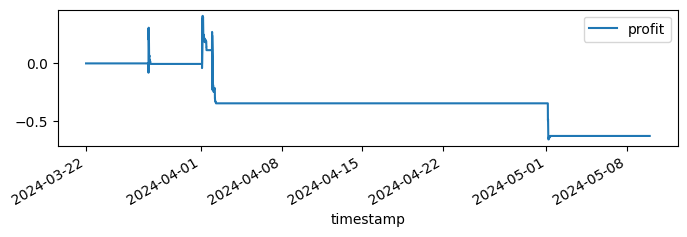

In [24]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.GEMINI,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.BY_MINUTE,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

2024-05-14 17:05:29,816 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_window(30))_collective_drop_recovery_trading_param(collective_drop_threshold(-0.03)_collective_drop_lower_threshold(-0.3)_drop_threshold(-0.03)_jump_from_drop_threshold(0.005)/exit_drop_threshold(-0.01))_collective_jump_recovery_trading_param(None)/trading-290017.market_data_bithumb.orderbook_level1/2024-03-01T00:00:00-0500_2024-03-02T00:00:00-0500.parquet' does not exist in local cache. For gcs, blob_exist=False.
2024-05-14 17:05:29,818 [MainThread  ] [INFO ]  df_cache is None for (datetime.datetime(2024, 3, 1, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>), datetime.datetime(2024, 3, 2, 0, 0, tzinfo=<DstTzInfo 'America/New_York' EST-1 day, 19:00:00 STD>))
2024-05-14 17:05:29,867 [MainThread  ] [INFO ]  filename='/home/junlim/algo_cache/trading/(collectivechanges_trading)_feature_param(window(40)_collective_wind

<Axes: xlabel='timestamp'>

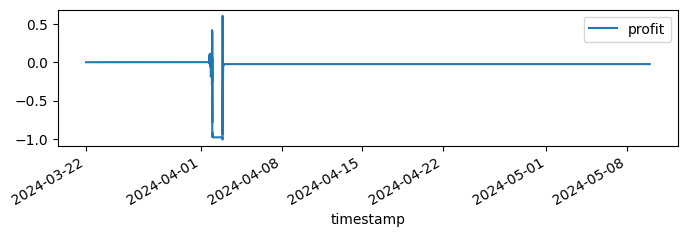

In [27]:
dfst_trading = algo.cache.read_df(
    label = algo.collective_jitter_recovery.research.get_trading_label_for_caching(trading_param),
    dataset_mode = market_data.ingest.bq.common.DATASET_MODE.BITHUMB,
    export_mode = market_data.ingest.bq.common.EXPORT_MODE.ORDERBOOK_LEVEL1,
    date_str_from=date_str_from, 
    date_str_to=date_str_to,
    columns=['profit', 'value', 'position_changed']
)
dfst_trading[['profit']].groupby('timestamp').sum().cumsum().plot(figsize=(8,2))

## single symobl

In [303]:
import algo.jitter_recovery.calculate
importlib.reload(algo.jitter_recovery.calculate)
import algo.collective_jitter_recovery.calculate
importlib.reload(algo.collective_jitter_recovery.calculate)
import algo.jitter_recovery.research
importlib.reload(algo.jitter_recovery.research)
import algo.collective_jitter_recovery.research
importlib.reload(algo.collective_jitter_recovery.research)

<module 'algo.collective_jitter_recovery.research' from '/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py'>

In [299]:
symbol_investigate = 'PEPE-USDT-SWAP'
dfs = dfi.xs(symbol_investigate, level=1)

/home/junlim/projects/jitter_recovery/algo/collective_jitter_recovery/research.py:109: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  if i in df_collective_feature.index:


no trading happens


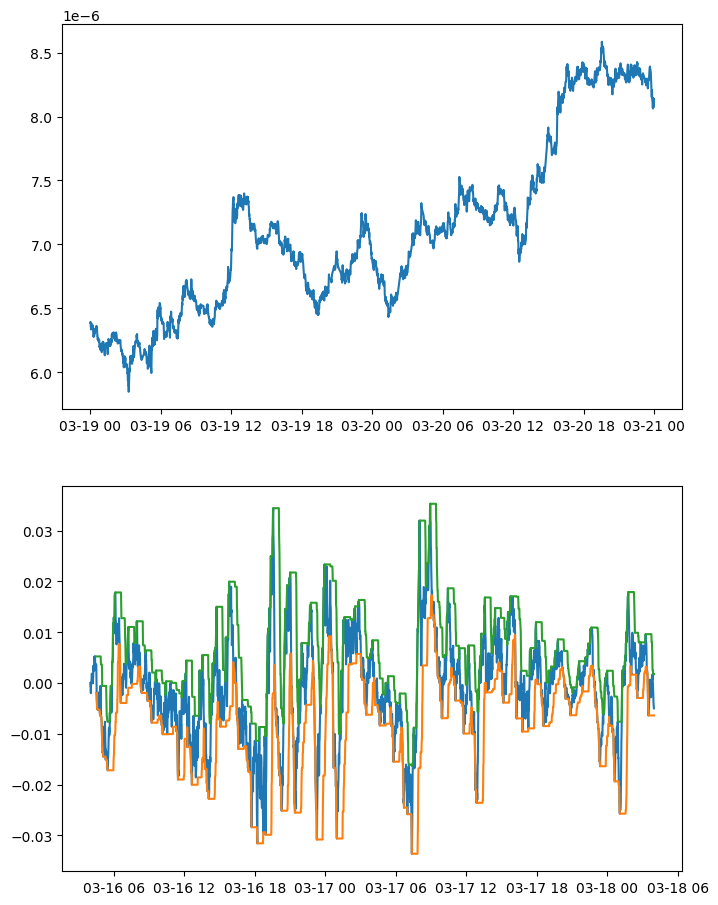

In [302]:
df_feature, df_trading = algo.collective_jitter_recovery.research.investigate_symbol(df, df_collective_feature, symbol_investigate, trading_param, figsize=(8, 11))

In [44]:
df_trading.columns

Index(['avg_v_before_max_ch', 'avg_v_before_min_ch', 'ch', 'ch_max', 'ch_min',
       'ch_since_max', 'ch_since_min', 'distance_max_ch', 'distance_min_ch',
       'v_ch_max_is_from', 'v_ch_max_is_to', 'v_ch_min_is_from',
       'v_ch_min_is_to', 'value', 'in_position', 'value_at_enter',
       'lowest_since_enter', 'highest_since_enter',
       'ch_from_lowest_since_enter', 'ch_from_highest_since_enter',
       'timedelta_since_position_enter', 'v_ch_max_is_to_when_enter',
       'v_ch_min_is_to_when_enter', 'v_ch_max_is_from_when_enter',
       'v_ch_min_is_from_when_enter', 'ch_from_enter', 'ch_collective',
       'ch_max_collective', 'ch_min_collective', 'ch_since_max_collective',
       'ch_since_min_collective', 'ch_window30_min_collective',
       'ch_window30_max_collective', 'ch_window60_min_collective',
       'ch_window60_max_collective', 'position_changed', 'profit_raw',
       'profit'],
      dtype='object')

<Axes: xlabel='timestamp'>

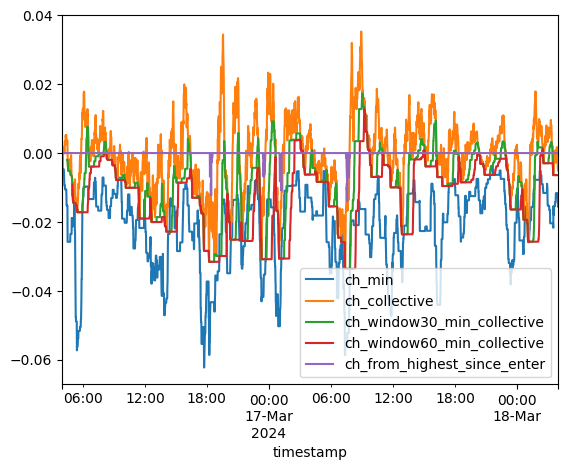

In [45]:
df_trading[['ch_min', 'ch_collective', 'ch_window30_min_collective', 'ch_window60_min_collective', 'ch_from_highest_since_enter']].plot()

In [577]:
df_trading[(df_trading.position_changed != 0)][['value', 'in_position', 'position_changed', 'profit_raw', 'profit']].dropna()

,value,in_position,position_changed,profit_raw,profit
timestamp,,,,,
2024-01-03 12:13:00,0.000265,1,1.0,0.000000,0.000000
2024-01-03 12:16:00,0.000258,0,-1.0,-0.000014,-0.052225
2024-01-03 12:17:00,0.000275,1,1.0,0.000000,0.000000
2024-01-03 12:19:00,0.000269,0,-1.0,-0.000015,-0.053502
2024-01-03 12:20:00,0.000279,1,1.0,0.000000,0.000000
2024-01-03 12:26:00,0.000283,0,-1.0,0.000008,0.029080
2024-01-03 12:27:00,0.000278,1,1.0,-0.000000,-0.000000
2024-01-03 12:32:00,0.000286,0,-1.0,-0.000004,-0.012440


In [578]:
for _, row in dfst_trading[(dfst_trading.position_changed != 0)].dropna().reset_index().sort_values('timestamp').iterrows():
    if row['symbol'] != symbol_investigate: continue
    print(f'{row["timestamp"]}, {row["symbol"]}, {row["value"]}, position_changed: {row["position_changed"]}')

2024-01-03 12:13:00, TURBO-USDT-SWAP, 0.0002649, position_changed: 1.0
2024-01-03 12:16:00, TURBO-USDT-SWAP, 0.0002577, position_changed: -1.0
2024-01-03 12:17:00, TURBO-USDT-SWAP, 0.0002746, position_changed: 1.0
2024-01-03 12:19:00, TURBO-USDT-SWAP, 0.0002689, position_changed: -1.0
2024-01-03 12:20:00, TURBO-USDT-SWAP, 0.0002791, position_changed: 1.0
2024-01-03 12:26:00, TURBO-USDT-SWAP, 0.0002831, position_changed: -1.0
2024-01-03 12:27:00, TURBO-USDT-SWAP, 0.0002781, position_changed: 1.0
2024-01-03 12:32:00, TURBO-USDT-SWAP, 0.0002858, position_changed: -1.0
